## Chapter6.3 データの評価

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数の定義

In [2]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(0, 1, 0.25), yticks=np.arange(0, 1, 0.25),
               xlim=(0, 1), ylim=(0, 1), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax

データセットの作成

In [3]:
np.random.seed(42)
X_dataset = np.random.rand(1000, 2)
y_dataset = np.random.randint(10, size=1000) // 9

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

SVMで学習と推論

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 学習用とテスト用にデータセットを分ける
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)

# 学習と推論（正解率算出）
classifier = SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.92500000000000004

推論結果を見てみると…

In [5]:
# テスト用データセットの推論
classifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

データセットをプロット

(<matplotlib.figure.Figure at 0x113c8afd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113c8abd0>)

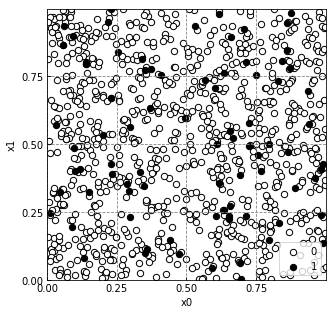

In [6]:
plot_dataset(dataset)

乳がんのデータを学習
<font color="red">**PROJECTID**を書き換えて実行してください</font>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# BigQueryクエリ結果をDataFrameに読み込む
query = 'SELECT * FROM testdataset.wdbc ORDER BY index'
dataset = pd.read_gbq(project_id='PROJECTID', query=query)

# 'M'を0, 'B'を1に変換
dataset['diagnostic'] = dataset['diagnostic'].apply(
    lambda x: 0 if x == 'M' else 1)

# 'index'カラムを削除
dataset.drop('index', axis=1, inplace=True)

# DataFrameからarrayに変換
X_dataset = dataset.drop('diagnostic', axis=1).as_matrix()
y_dataset = dataset.diagnostic.as_matrix()

# 学習用とテスト用にデータセットを分ける
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)


# 最大値が1、最小値が0になるよう各特徴量をスケールする
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 学習と推論を行う
classifier = SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 569 rows.

Total time taken 1.53 s.
Finished at 2017-09-26 22:16:22.


0.94736842105263153

コンフュージョン・マトリックスを作成

In [8]:
from sklearn.metrics import confusion_matrix

# 推論を実行
y_pred = classifier.predict(X_test)

# コンフュージョン・マトリックスを生成
confusion_matrix(y_test, y_pred)

array([[41,  5],
       [ 1, 67]])